In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as smf
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [272]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [273]:
data.shape

(50, 5)

# EDA

In [274]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [275]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [276]:
#rename
data=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [277]:
#Check for Duplicate data
data[data.duplicated()]

,RDS,ADMS,MKTS,State,Profit


In [278]:
data.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [279]:
data.describe

<bound method NDFrame.describe of           RDS       ADMS       MKTS       State     Profit
0   165349.20  136897.80  471784.10    New York  192261.83
1   162597.70  151377.59  443898.53  California  191792.06
2   153441.51  101145.55  407934.54     Florida  191050.39
3   144372.41  118671.85  383199.62    New York  182901.99
4   142107.34   91391.77  366168.42     Florida  166187.94
5   131876.90   99814.71  362861.36    New York  156991.12
6   134615.46  147198.87  127716.82  California  156122.51
7   130298.13  145530.06  323876.68     Florida  155752.60
8   120542.52  148718.95  311613.29    New York  152211.77
9   123334.88  108679.17  304981.62  California  149759.96
10  101913.08  110594.11  229160.95     Florida  146121.95
11  100671.96   91790.61  249744.55  California  144259.40
12   93863.75  127320.38  249839.44     Florida  141585.52
13   91992.39  135495.07  252664.93  California  134307.35
14  119943.24  156547.42  256512.92     Florida  132602.65
15  114523.61  122616.

Text(0, 0.5, 'Profit')

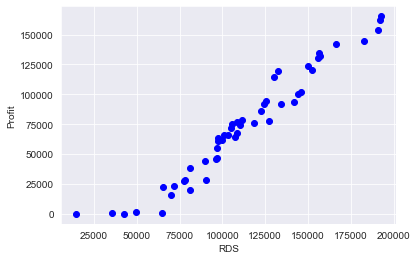

In [280]:
plt.plot(data.Profit,data.RDS,"bo")
plt.xlabel("RDS")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

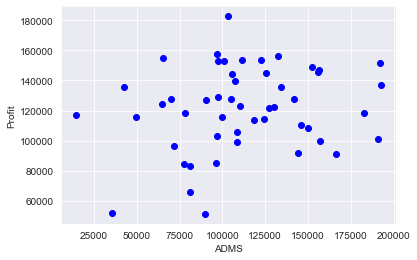

In [281]:
plt.plot(data.Profit,data.ADMS,"bo")
plt.xlabel("ADMS")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

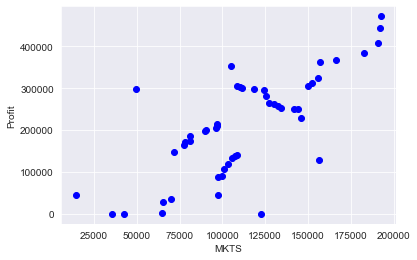

In [282]:
plt.plot(data.Profit,data.MKTS,"bo")
plt.xlabel("MKTS")
plt.ylabel("Profit")

{'whiskers': [<matplotlib.lines.Line2D at 0x1155565adc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1155565a460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1155565d280>],
 'medians': [<matplotlib.lines.Line2D at 0x1155565f0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1155565f430>],
 'means': []}

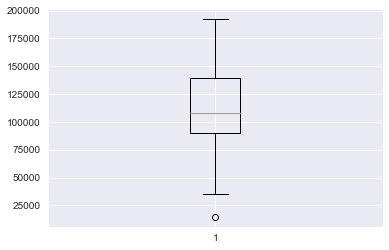

In [283]:
plt.boxplot(data.Profit)

{'whiskers': [<matplotlib.lines.Line2D at 0x1155978c7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1155978cee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1155978c430>],
 'medians': [<matplotlib.lines.Line2D at 0x11559797640>],
 'fliers': [<matplotlib.lines.Line2D at 0x115597979d0>],
 'means': []}

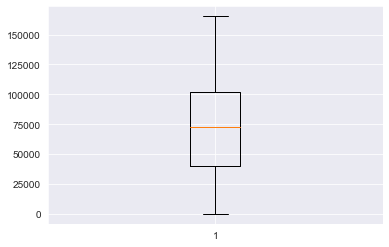

In [284]:
plt.boxplot(data.RDS)

{'whiskers': [<matplotlib.lines.Line2D at 0x115597ebf40>,
 'caps': [<matplotlib.lines.Line2D at 0x115597fa6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x115597ebbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x115597fadc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11559806190>],
 'means': []}

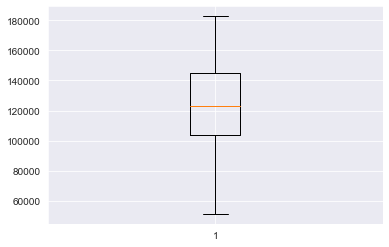

In [285]:
plt.boxplot(data.ADMS)

{'whiskers': [<matplotlib.lines.Line2D at 0x1155985b760>,
 'caps': [<matplotlib.lines.Line2D at 0x1155985be80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1155985b3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x115598675e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11559867970>],
 'means': []}

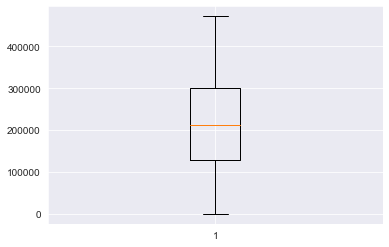

In [286]:
plt.boxplot(data.MKTS)

(array([ 1.,  3.,  2.,  6., 10.,  8.,  7.,  7.,  2.,  4.]),
 array([ 14681.4  ,  32439.443,  50197.486,  67955.529,  85713.572,
        103471.615, 121229.658, 138987.701, 156745.744, 174503.787,
        192261.83 ]),
 <BarContainer object of 10 artists>)

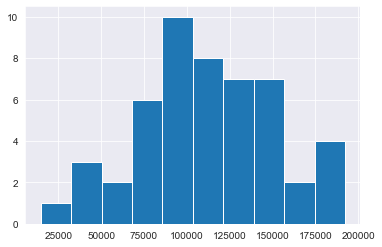

In [287]:
plt.hist(data.Profit)

(array([6., 6., 4., 7., 8., 5., 3., 5., 3., 3.]),
 array([     0.  ,  16534.92,  33069.84,  49604.76,  66139.68,  82674.6 ,
         99209.52, 115744.44, 132279.36, 148814.28, 165349.2 ]),
 <BarContainer object of 10 artists>)

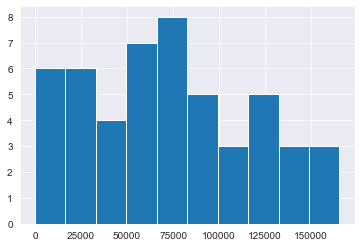

In [288]:
plt.hist(data.RDS)

(array([ 2.,  1.,  3.,  7.,  7., 12.,  4., 11.,  2.,  1.]),
 array([ 51283.14 ,  64419.382,  77555.624,  90691.866, 103828.108,
        116964.35 , 130100.592, 143236.834, 156373.076, 169509.318,
        182645.56 ]),
 <BarContainer object of 10 artists>)

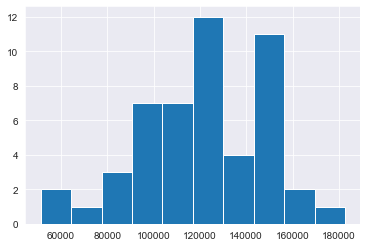

In [289]:
plt.hist(data.ADMS)

(array([8., 2., 6., 5., 6., 7., 9., 3., 2., 2.]),
 array([     0.  ,  47178.41,  94356.82, 141535.23, 188713.64, 235892.05,
        283070.46, 330248.87, 377427.28, 424605.69, 471784.1 ]),
 <BarContainer object of 10 artists>)

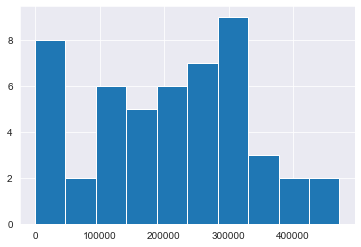

In [290]:
plt.hist(data.MKTS)

C:\Users\Pavani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

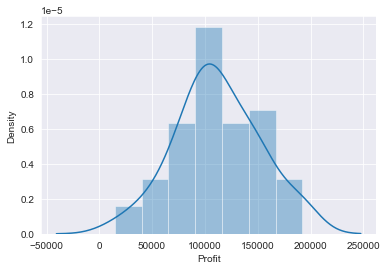

In [291]:
sns.distplot(data['Profit'])

C:\Users\Pavani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RDS', ylabel='Density'>

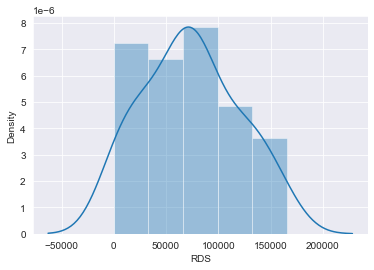

In [292]:
sns.distplot(data['RDS'])

C:\Users\Pavani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ADMS', ylabel='Density'>

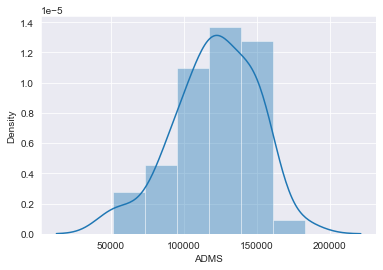

In [293]:
sns.distplot(data['ADMS'])

C:\Users\Pavani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MKTS', ylabel='Density'>

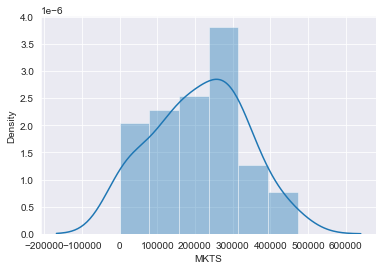

In [294]:
sns.distplot(data['MKTS'])

<AxesSubplot:xlabel='RDS', ylabel='Profit'>

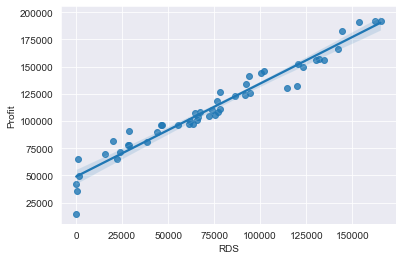

In [295]:
sns.regplot(x= data['RDS'],y= data['Profit'])

<AxesSubplot:xlabel='ADMS', ylabel='Profit'>

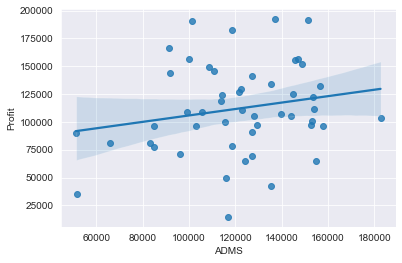

In [296]:
sns.regplot(x= data['ADMS'],y= data['Profit'])

<AxesSubplot:xlabel='MKTS', ylabel='Profit'>

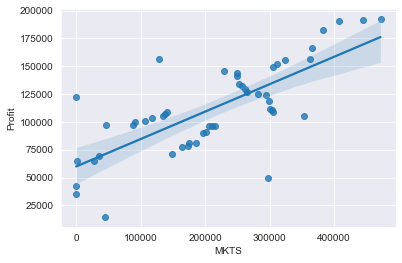

In [297]:
sns.regplot(x= data['MKTS'],y= data['Profit'])

# Correlation

In [298]:
data.corr()

,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot b/w Variables

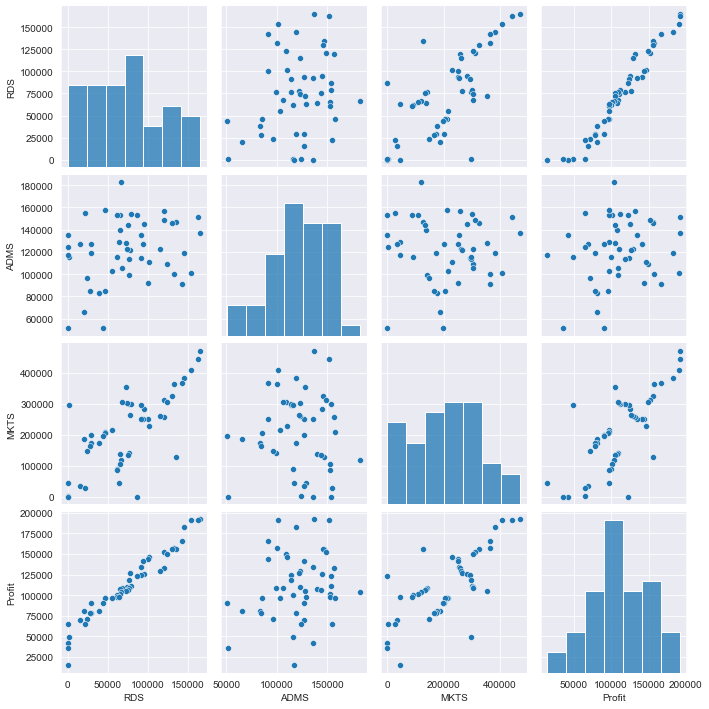

In [299]:
sns.pairplot(data)

# Regression Model

In [300]:
data = pd.get_dummies(data, columns=['State'])

In [301]:
X = data[['RDS','ADMS', 'MKTS', 'State_California', 'State_Florida', 'State_New York']]
Y = data[['Profit']]

In [302]:
model = smf.OLS(Y, X).fit()
predictions = model.predict(X)

In [303]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.34e-27
Time:                        10:39:55   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
RDS                  0.8060      0.046     17.369      0.000       0.712       0.900
ADMS                -0.0270      0.052     -0.517      0.608      -0.132       0.078
MKTS                 0.0270      0.017      1.574      0.123      -0.008       0.062
State_California  5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
State_Florida     5.032e+04   7251.767      6.940      0.000    3.57e+04    6.49e+04
State_New York    5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Residual Vs Regressors

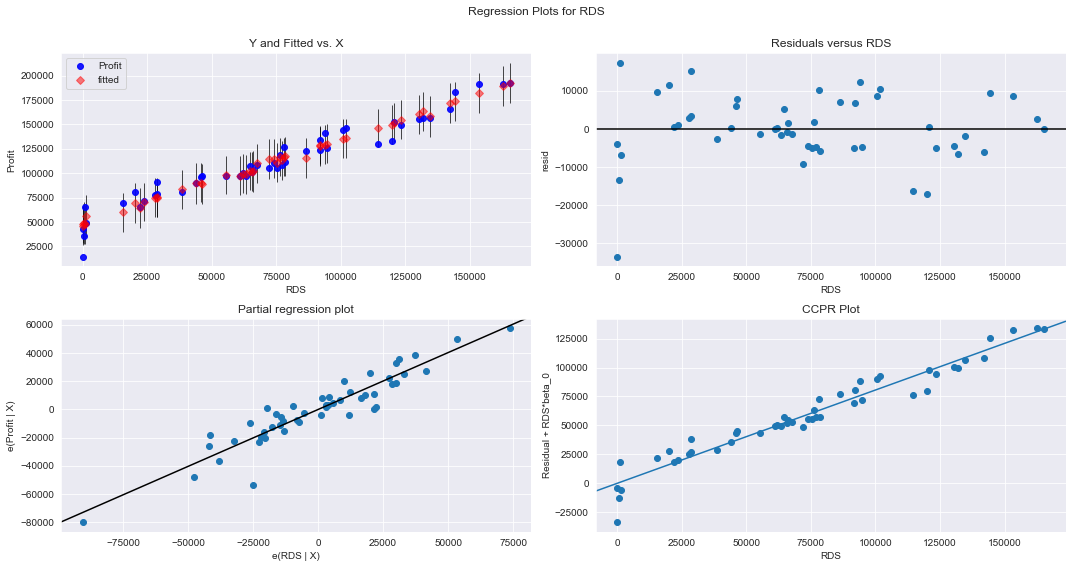

In [304]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

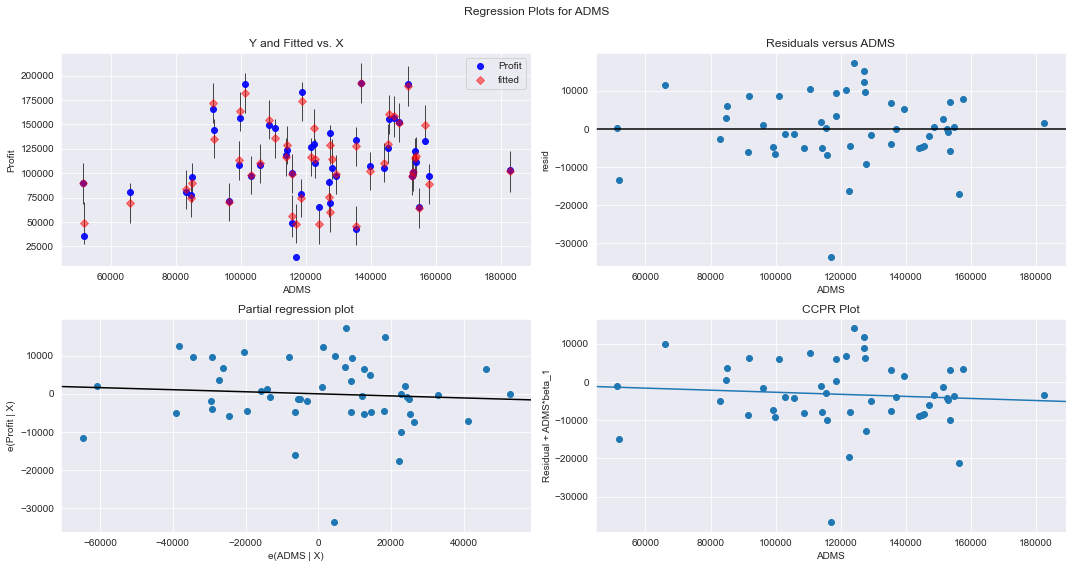

In [305]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADMS", fig=fig)
plt.show()

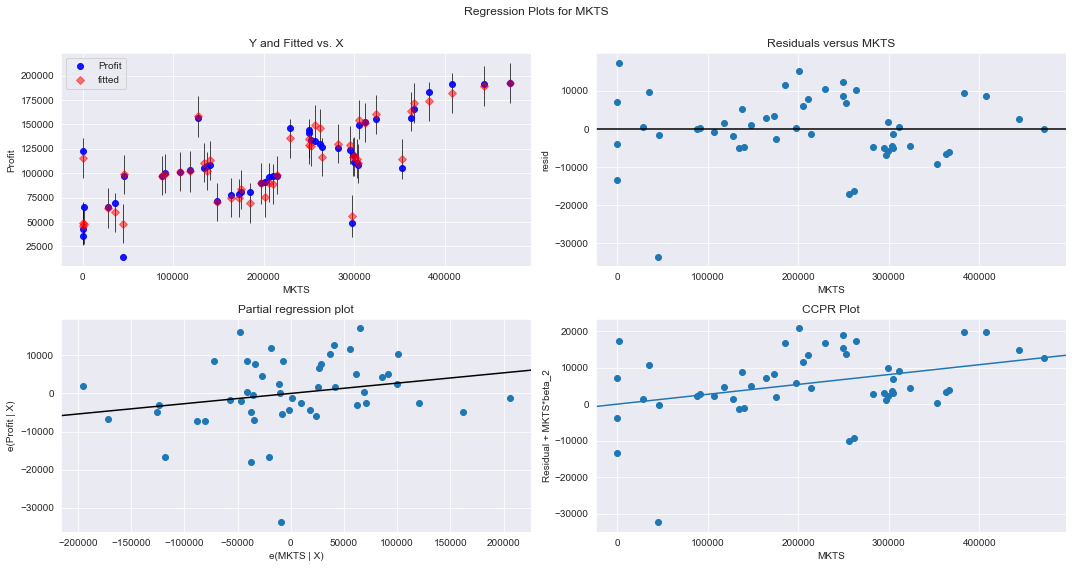

In [306]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKTS", fig=fig)
plt.show()

# Model Deletion Diagnostics (checking for Outliers or Influencers)
# 1. Cook's Distance

In [307]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

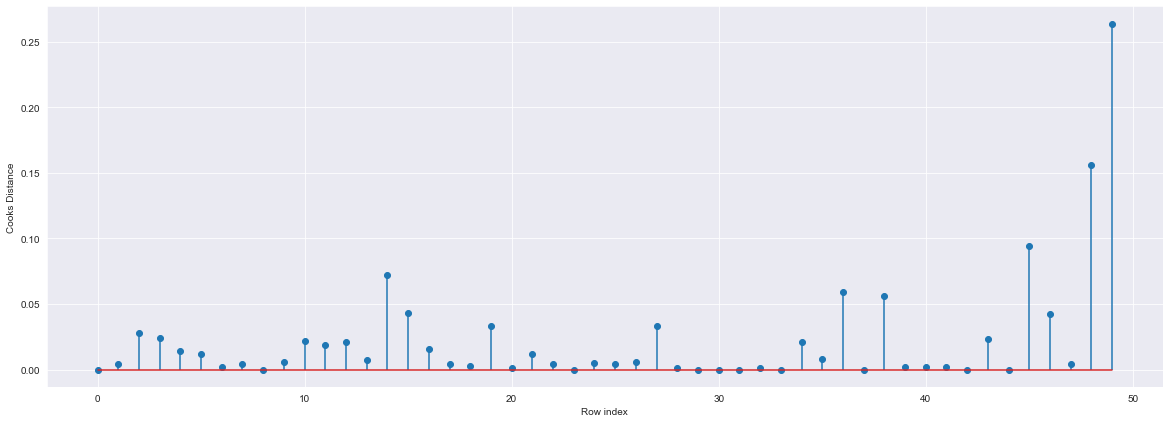

In [308]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [309]:
(np.argmax(c),np.max(c))

(49, 0.2639594359080658)

# 2. Leverage value

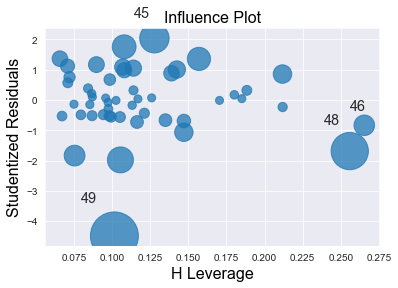

In [310]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [311]:
data.shape

(50, 7)

In [312]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.48

# Finding Variance Inflation Factor (VIF)

In [313]:
vif = pd.DataFrame()

In [314]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [315]:
vif["features"] = X.columns

In [316]:
vif.round(1)

,VIF Factor,features
0,2.5,RDS
1,1.2,ADMS
2,2.4,MKTS
3,9.0,State_California
4,9.4,State_Florida
5,9.2,State_New York


# ADMS has the lowest variance inflation factor, We would need to discard this variables to improve model and try to solve multicolinearity.

In [317]:
#Exclude ADMS from the dataframe and Test the model
new_X = data[['RDS', 'MKTS', 'State_California', 'State_Florida', 'State_New York']]

In [318]:
new_model = smf.OLS(Y, new_X).fit()
new_predictions = new_model.predict(new_X)

In [319]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           9.72e-29
Time:                        10:42:10   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
RDS                  0.7967      0.042     18.771      0.000       0.711       0.882
MKTS                 0.0298      0.016      1.842      0.072      -0.003       0.062
State_California  4.696e+04   3119.471     15.053      0.000    4.07e+04    5.32e+04
State_Florida      4.71e+04   3670.129     12.833      0.000    3.97e+04    5.45e+04
State_New York    4.694e+04   3342.591     14.043      0.000    4.02e+04    5.37e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     9.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Final Model

In [320]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
new_data = data.drop(data.index[[49]])

In [321]:
new_data 

,RDS,ADMS,MKTS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


In [322]:
new_X = new_data[['RDS', 'MKTS', 'State_California', 'State_Florida', 'State_New York']]
new_Y = new_data[['Profit']]

In [323]:
final_model = smf.OLS(new_Y, new_X).fit()
predictions = final_model.predict(new_X)

In [324]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     275.3
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           1.60e-30
Time:                        10:43:01   Log-Likelihood:                -506.11
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
RDS                  0.7760      0.036     21.721      0.000       0.704       0.848
MKTS                 0.0281      0.013      2.082      0.043       0.001       0.055
State_California  5.081e+04   2738.498     18.553      0.000    4.53e+04    5.63e+04
State_Florida     4.919e+04   3097.926     15.879      0.000    4.29e+04    5.54e+04
State_New York    4.887e+04   2822.188     17.315      0.000    4.32e+04    5.46e+04
==============================================================================
Omnibus:                        0.123   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.292
Skew:                           0.093   Prob(JB):                        0.864
Kurtosis:                       2.670   Cond. No.                     9.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We got Pvalues <= 0.05 and R-squared and Adjusted R-squared is > 0.75 thus the model is accepted  
# to reduce pvalue to 0.00 we are use square root

# Square Root Transformation of X

In [325]:
X_sqrt = np.sqrt(new_data[['RDS', 'MKTS', 'State_California', 'State_Florida', 'State_New York']])

In [326]:
model2 = smf.OLS(new_Y, X_sqrt).fit()
predictions2 = model2.predict(X_sqrt)

In [327]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     95.09
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           4.59e-21
Time:                        10:45:37   Log-Likelihood:                -530.44
No. Observations:                  49   AIC:                             1071.
Df Residuals:                      44   BIC:                             1080.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
RDS                338.2530     25.309     13.365      0.000     287.247     389.259
MKTS                18.4058     15.127      1.217      0.230     -12.080      48.892
State_California  1.959e+04   5882.326      3.331      0.002    7736.060    3.14e+04
State_Florida     1.835e+04   6554.582      2.799      0.008    5136.781    3.16e+04
State_New York    2.082e+04   5875.720      3.543      0.001    8978.093    3.27e+04
==============================================================================
Omnibus:                        6.630   Durbin-Watson:                   0.774
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.272
Skew:                           0.876   Prob(JB):                       0.0435
Kurtosis:                       3.052   Cond. No.                     2.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Square Root Transformation of Y

In [328]:
Y_sqrt = np.sqrt(new_data['Profit'])

In [329]:
model3 = smf.OLS(Y_sqrt, new_X).fit()
predictions3 = model3.predict(new_X)

In [330]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     189.5
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           3.99e-27
Time:                        10:45:51   Log-Likelihood:                -197.00
No. Observations:                  49   AIC:                             404.0
Df Residuals:                      44   BIC:                             413.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
RDS                  0.0012    6.5e-05     18.242      0.000       0.001       0.001
MKTS              3.463e-05   2.46e-05      1.410      0.165   -1.49e-05    8.41e-05
State_California   237.5501      4.987     47.638      0.000     227.500     247.600
State_Florida      236.4497      5.641     41.916      0.000     225.081     247.819
State_New York     234.1217      5.139     45.558      0.000     223.765     244.479
==============================================================================
Omnibus:                       11.160   Durbin-Watson:                   1.188
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.786
Skew:                          -0.899   Prob(JB):                      0.00276
Kurtosis:                       4.593   Cond. No.                     9.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#  Square Root Transformation of X & Y

In [331]:
model4 = smf.OLS(Y_sqrt, X_sqrt).fit()
predictions4 = model4.predict(X_sqrt)

In [332]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     165.8
Date:                Fri, 18 Feb 2022   Prob (F-statistic):           6.33e-26
Time:                        10:46:00   Log-Likelihood:                -200.09
No. Observations:                  49   AIC:                             410.2
Df Residuals:                      44   BIC:                             419.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
RDS                  0.5306      0.030     17.760      0.000       0.470       0.591
MKTS                 0.0256      0.018      1.436      0.158      -0.010       0.062
State_California   185.9986      6.944     26.786      0.000     172.004     199.993
State_Florida      184.8487      7.737     23.890      0.000     169.255     200.442
State_New York     187.1502      6.936     26.982      0.000     173.172     201.129
==============================================================================
Omnibus:                       10.783   Durbin-Watson:                   1.373
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.488
Skew:                           0.983   Prob(JB):                      0.00528
Kurtosis:                       4.129   Cond. No.                     2.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [333]:
(final_model.rsquared,final_model.rsquared_adj)

(0.9615819564241954, 0.9580894070082132)

# Predicting for new data

In [334]:
new_data=pd.DataFrame({'RDS':50000,"ADMS":90000,"MKTS":180000},index=[0])
new_data

,RDS,ADMS,MKTS
0,50000,90000,180000


In [351]:
pred_y=final_data.predict(data2)

In [352]:
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [347]:
d2={'Prep_Models':['Model','New_Model','Final_Model'],'Rsquared':[model.rsquared,new_model.rsquared,final_data.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950752
1,New_Model,0.950453
2,Final_Model,0.961316
